<a href="https://colab.research.google.com/github/jaiz23/Big-Data-Analytics/blob/main/icp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating a DataFrame from a given dictionary

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = {
    'ID': np.arange(1,1000001),
    'Value': np.random.rand(1000000),
    'Category': np.random.choice(['A', 'B', 'C','D'], size=1000000)
}


In [3]:
dataFrame = pd.DataFrame(data)

In [4]:
dataFrame.head()

,ID,Value,Category
0,1,0.547264,C
1,2,0.190546,B
2,3,0.322659,C
3,4,0.164223,B
4,5,0.285175,A


In [5]:
dataFrame['Value']

,Value
0,0.547264
1,0.190546
2,0.322659
3,0.164223
4,0.285175
...,...
999995,0.301739
999996,0.195079
999997,0.663547
999998,0.313175


In [6]:
dataFrame.columns = ["ID number", "Random value", "Choice"]

In [7]:
dataFrame.head()

,ID number,Random value,Choice
0,1,0.547264,C
1,2,0.190546,B
2,3,0.322659,C
3,4,0.164223,B
4,5,0.285175,A


In [8]:
import pandas as pd


pd.set_option('display.max_rows', None)

student_data = pd.DataFrame({
'school_code': ['s001', 's002', 's003', 's001', 's002', 's004'],
'class': ['V', 'V', 'VI', 'VI', 'V', 'VI'],
'name': ['Alberto Franco', 'Gino Mcneill', 'Ryan Parkes',
             'Eesha Hinton', 'Gino Mcneill', 'David Parkes'],
'date_Of_Birth': ['15/05/2002', '17/05/2002', '16/02/1999',
                      '25/09/1998', '11/05/2002', '15/09/1997'],
'age': [12, 12, 13, 13, 14, 12],
'height': [173, 192, 186, 167, 151, 159],
'weight': [35, 32, 33, 30, 31, 32],
'address': ['street1', 'street2', 'street3', 'street1', 'street2', 'street4']
}, index=['S1', 'S2', 'S3', 'S4', 'S5', 'S6'])
print("Original DataFrame:")
print(student_data)
print('\nSplit the said data on school_code, class wise:')
result = student_data.groupby(['school_code', 'class'])

for name, group in result:
    print("\nGroup:")
    print(name)
    print(group)


Original DataFrame:
   school_code class            name date_Of_Birth  age  height  weight  \
S1        s001     V  Alberto Franco    15/05/2002   12     173      35   
S2        s002     V    Gino Mcneill    17/05/2002   12     192      32   
S3        s003    VI     Ryan Parkes    16/02/1999   13     186      33   
S4        s001    VI    Eesha Hinton    25/09/1998   13     167      30   
S5        s002     V    Gino Mcneill    11/05/2002   14     151      31   
S6        s004    VI    David Parkes    15/09/1997   12     159      32   

    address  
S1  street1  
S2  street2  
S3  street3  
S4  street1  
S5  street2  
S6  street4  

Split the said data on school_code, class wise:

Group:
('s001', 'V')
   school_code class            name date_Of_Birth  age  height  weight  \
S1        s001     V  Alberto Franco    15/05/2002   12     173      35   

    address  
S1  street1  

Group:
('s001', 'VI')
   school_code class          name date_Of_Birth  age  height  weight  address
S4  

In [9]:
file_id = '1-Ir3AXK1A77A-qCDu5gGkAxv-nbmWlHO'
url = f'https://drive.google.com/uc?id={file_id}'

In [10]:
df = pd.read_csv(url)

In [11]:
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [12]:
# 8. Check for null values
print(df.isnull().sum())
print(df.describe())

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [13]:
# 8a. Replace null values with the mean (only numeric columns)
df.fillna(df.mean(numeric_only=True), inplace=True)

In [14]:
# 9. Aggregate two columns using min, max, count, mean
agg = df[["Calories", "Pulse"]].agg(["min", "max", "count", "mean"])
print(agg)


          Calories       Pulse
min      50.300000   80.000000
max    1860.400000  159.000000
count   169.000000  169.000000
mean    375.790244  107.461538


In [15]:
# 10. Filter rows with 500 <= Calories <= 1000
cal_range = df[(df["Calories"] >= 500) & (df["Calories"] <= 1000)]
print(cal_range)

     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [16]:
# 11. Filter rows where Calories > 500 and Pulse < 100
cal_pulse_filter = df[(df["Calories"] > 500) & (df["Pulse"] < 100)]
print(cal_pulse_filter)


     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [17]:
# 12. Create df_modified without 'Maxpulse'
df_modified = df.drop(columns=["Maxpulse"])
print(df_modified.head())

   Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0


In [18]:
# 13. Delete 'Maxpulse' column from original df
df.drop(columns=["Maxpulse"], inplace=True)

In [19]:
# 14. Convert 'Calories' to integer type
df["Calories"] = df["Calories"].astype(int)

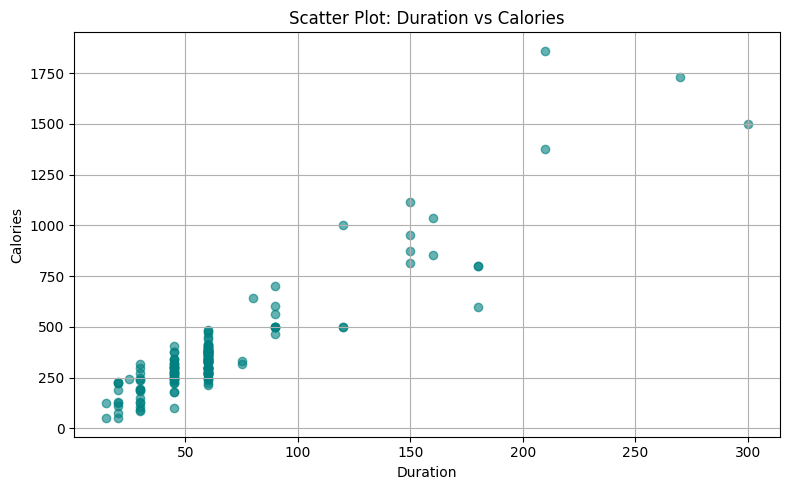

In [20]:
# 15. Scatter plot of Duration vs Calories
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(df["Duration"], df["Calories"], color='teal', alpha=0.6)
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.title("Scatter Plot: Duration vs Calories")
plt.grid(True)
plt.tight_layout()
plt.show()